In [1854]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Définition du chemin vers les fichiers csv
path = "./transactions-ser"
# Récupération de tous les fichiers csv dans le répertoire spécifié
all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
# Boucle sur chaque fichier csv pour en créer un dataframe et l'ajouter à la liste
for f in all_files:
    df = pd.read_csv(f, sep=';')
    df['file'] = f.split('/')[-1]
    all_df.append(df)

data = pd.concat(all_df, ignore_index=True)
merged_df = data.copy()
display(merged_df)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,...,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,...,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,...,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,...,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW,transactions-ser\76575_000BW.csv
2968,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2969,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,...,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2970,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,...,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW,transactions-ser\76575_000BW.csv


In [1855]:
# Récupèrer que les lignes qui contient appartement et maison et les stocker dans 2 dataframe différents
df_app = merged_df[merged_df.type_local == 'Appartement']
df_mai = merged_df[merged_df.type_local == 'Maison']


In [1856]:
# Remplacement des valeurs 'None' par NaN dans les deux dataframes
df_app=df_app.replace(to_replace='None', value=np.nan)
df_mai=df_mai.replace(to_replace='None', value=np.nan)

df_mai


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,NaN,RUE DELILLE,582,76800,...,4.0,S,sols,NaN,NaN,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,NaN,RUE ALFRED DE MUSSET,40,76800,...,4.0,S,sols,NaN,NaN,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,NaN,RUE PAUL VERLAINE,1920,76800,...,4.0,S,sols,NaN,NaN,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
7,2019-1116084,2019-08-28,1,Vente,180000.0,28.0,NaN,RUE DELILLE,582,76800,...,5.0,S,sols,NaN,NaN,348.0,1.071647,49.401956,000AB,transactions-ser\76575_000AB.csv
8,2019-1114082,2019-06-14,1,Vente,188000.0,38.0,NaN,RUE DELILLE,582,76800,...,5.0,S,sols,NaN,NaN,377.0,1.070502,49.402256,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2017-544464,2017-09-27,1,Vente,225000.0,1.0,NaN,RUE PIERRE JEAN DE BERANGER,1335,76800,...,6.0,S,sols,NaN,NaN,389.0,1.069955,49.399447,000BV,transactions-ser\76575_000BV.csv
2948,2017-544392,2017-09-13,1,Vente,145000.0,27.0,NaN,RUE LAMARTINE,1420,76800,...,5.0,S,sols,NaN,NaN,374.0,1.072432,49.400659,000BV,transactions-ser\76575_000BV.csv
2949,2017-544056,2017-09-08,1,Vente,262500.0,5.0,NaN,RUE PIERRE JEAN DE BERANGER,1335,76800,...,5.0,S,sols,NaN,NaN,434.0,1.069653,49.399310,000BV,transactions-ser\76575_000BV.csv
2950,2017-544305,2017-09-08,1,Vente,130000.0,25.0,NaN,RUE LAMARTINE,1420,76800,...,4.0,S,sols,NaN,NaN,369.0,1.072534,49.400600,000BV,transactions-ser\76575_000BV.csv


In [1857]:
# Suppression des colonnes entièrement vides dans le dataframe 'df_mai'
df_mai = df_mai.dropna(axis=1, how='all')

In [1858]:
#Calcule du pourcentage de valeur manquantes pour chaque colonnes
missing_rate = df_mai.isna().sum()/df_mai.shape[0]
missing_rate

id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
adresse_numero                  0.000929
adresse_suffixe                 0.959146
adresse_nom_voie                0.000000
adresse_code_voie               0.000000
code_postal                     0.000000
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
id_parcelle                     0.000000
lot1_numero                     0.996286
lot1_surface_carrez             0.997214
nombre_lots                     0.000000
code_type_local                 0.000000
type_local                      0.000000
surface_reelle_bati             0.000000
nombre_pieces_principales       0.000000
code_nature_culture             0.004643
nature_culture                  0.004643
code_nature_culture_speciale    0.981430
nature_culture_s

In [1859]:
#supprimer les colonnes ayant un mesure_rate > 0.8 ainsi que les colonnes qui n'affecterons pas nos résultats
df_mai = df_mai.drop(columns=['adresse_suffixe','lot1_numero', 'lot1_surface_carrez','nature_culture','code_type_local','nombre_lots','code_nature_culture_speciale','adresse_code_voie','code_postal','nature_culture_speciale','id_parcelle','type_local','nom_commune','adresse_nom_voie','id_mutation','file'
])

In [1860]:
df_mai.corr()

,numero_disposition,valeur_fonciere,adresse_numero,code_commune,code_departement,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
numero_disposition,1.000000,-0.037937,-0.005742,NaN,NaN,-0.034021,-0.037978,-0.018578,0.057567,0.019895
valeur_fonciere,-0.037937,1.000000,-0.020844,NaN,NaN,0.383937,0.207474,0.199816,-0.226475,0.135552
adresse_numero,-0.005742,-0.020844,1.000000,NaN,NaN,0.031216,0.019974,0.027402,0.057500,-0.129625
code_commune,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
code_departement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surface_reelle_bati,-0.034021,0.383937,0.031216,NaN,NaN,1.000000,0.610393,0.014390,-0.119481,0.028603
nombre_pieces_principales,-0.037978,0.207474,0.019974,NaN,NaN,0.610393,1.000000,-0.043220,-0.130101,0.099038
surface_terrain,-0.018578,0.199816,0.027402,NaN,NaN,0.014390,-0.043220,1.000000,-0.085828,0.089590
longitude,0.057567,-0.226475,0.057500,NaN,NaN,-0.119481,-0.130101,-0.085828,1.000000,-0.771464
latitude,0.019895,0.135552,-0.129625,NaN,NaN,0.028603,0.099038,0.089590,-0.771464,1.000000


In [1861]:
df_mai = df_mai.drop(columns=['code_commune','code_departement'], axis=1)

array([1, 2, 3], dtype=int64)

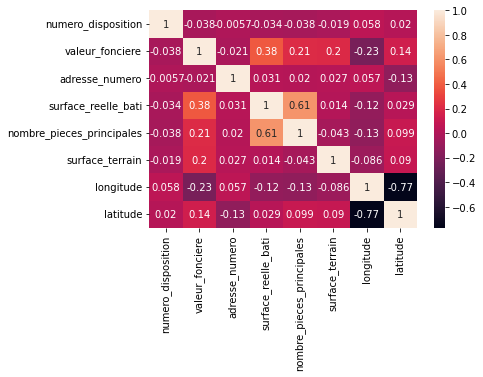

In [1862]:
#visualisation de la correlation pour mieux voir la relation entre les données
sns.heatmap(df_mai.corr(), annot=True)
df_mai.numero_disposition.unique()

In [1863]:
#On commence l'encodage des variables qualitatifs

df_mai['date_mutation'] = pd.to_datetime(df_mai['date_mutation'])
df_mai['annee_mutation'] = df_mai['date_mutation'].dt.year

df_mai = df_mai.drop(['date_mutation'], axis=1)

In [1864]:
#On doit transformer toutes les variables de type object
df_mai.dtypes

numero_disposition             int64
nature_mutation               object
valeur_fonciere              float64
adresse_numero               float64
surface_reelle_bati          float64
nombre_pieces_principales    float64
code_nature_culture           object
surface_terrain              float64
longitude                    float64
latitude                     float64
section_prefixe               object
annee_mutation                 int64
dtype: object

In [1865]:
code = {'Vente': 0,
        'Adjudication': 1,
        'Vente en l\'état futur d\'achèvement': 2,
        'S':0,
        'AG':1,
        'J':2,
        'L':3,
        'AB':4,
        '1':1,
        '2':2,
        '000AB': 0, '000AC': 1, '000AD': 2, '000AE': 3, '000AH': 4, '000AI': 5, '000AK': 6, '000AO': 7, '000AP': 8,
        '000AR': 9, '000AS': 10, '000AT': 11, '000AV': 12, '000AW': 13, '000AX': 14, '000AY': 15, '000AZ': 16, '000BC': 17,
        '000BD': 18, '000BE': 19, '000BH': 20, '000BK': 21, '000BL': 22, '000BM': 23, '000BO': 24, '000BP': 25, '000BR': 26,
        '000BS': 27, '000BT': 28, '000BV': 29, '000BW': 30
       }

for col in df_mai.select_dtypes('object'):
    df_mai[col] = df_mai[col].map(code)

In [1866]:
display(df_mai)

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe,annee_mutation
0,1,0,260000.0,26.0,129.0,4.0,0.0,351.0,1.071855,49.401886,0,2022
2,1,0,160000.0,13.0,64.0,4.0,0.0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,64.0,4.0,0.0,498.0,1.070475,49.403622,0,2021
7,1,0,180000.0,28.0,108.0,5.0,0.0,348.0,1.071647,49.401956,0,2019
8,1,0,188000.0,38.0,74.0,5.0,0.0,377.0,1.070502,49.402256,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,0,225000.0,1.0,188.0,6.0,0.0,389.0,1.069955,49.399447,29,2017
2948,1,0,145000.0,27.0,74.0,5.0,0.0,374.0,1.072432,49.400659,29,2017
2949,1,0,262500.0,5.0,102.0,5.0,0.0,434.0,1.069653,49.399310,29,2017
2950,1,0,130000.0,25.0,64.0,4.0,0.0,369.0,1.072534,49.400600,29,2017


<AxesSubplot:>

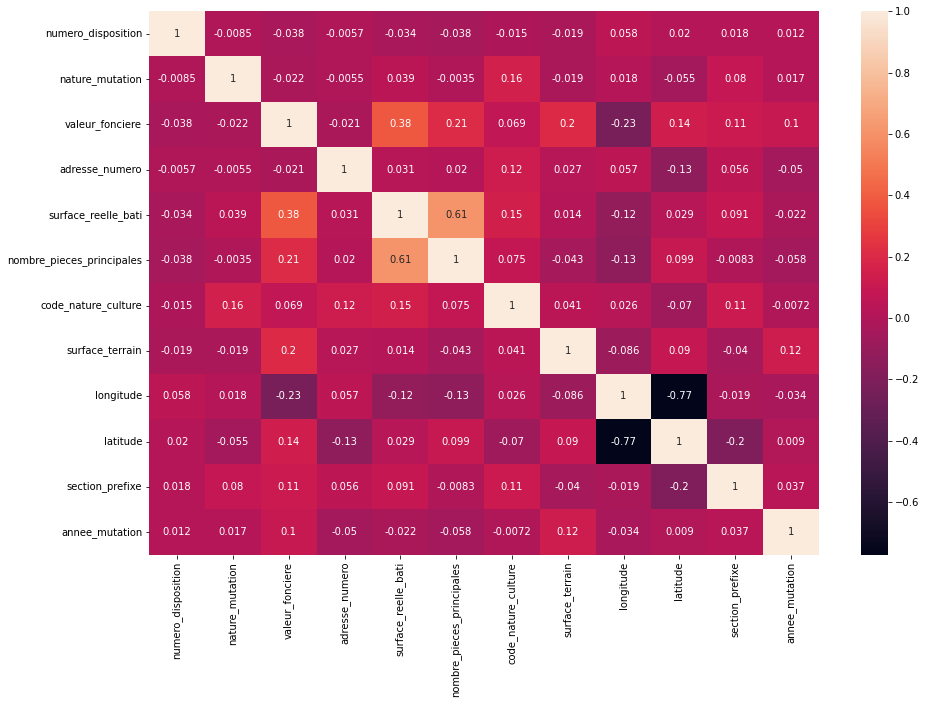

In [1867]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_mai.corr(), annot=True)

In [1868]:
#Suppression de quelques lignes qui affecteront la correlation entre les données
nan_counts = df_mai.isnull().sum()
print(nan_counts)

df_mai = df_mai.drop(df_mai[df_mai['valeur_fonciere'] == 3060533.2].index)


numero_disposition           0
nature_mutation              0
valeur_fonciere              0
adresse_numero               1
surface_reelle_bati          0
nombre_pieces_principales    0
code_nature_culture          5
surface_terrain              5
longitude                    5
latitude                     5
section_prefixe              0
annee_mutation               0
dtype: int64


In [1869]:
df_mai = df_mai.drop(df_mai[df_mai['valeur_fonciere'] == 1.0].index)

In [1870]:
df_mai = df_mai.drop(df_mai[df_mai['nombre_pieces_principales'] == 22.0].index)
df_mai = df_mai.dropna()
df_mai = df_mai.drop(columns=['numero_disposition','adresse_numero','section_prefixe','nature_mutation','annee_mutation'])

<AxesSubplot:>

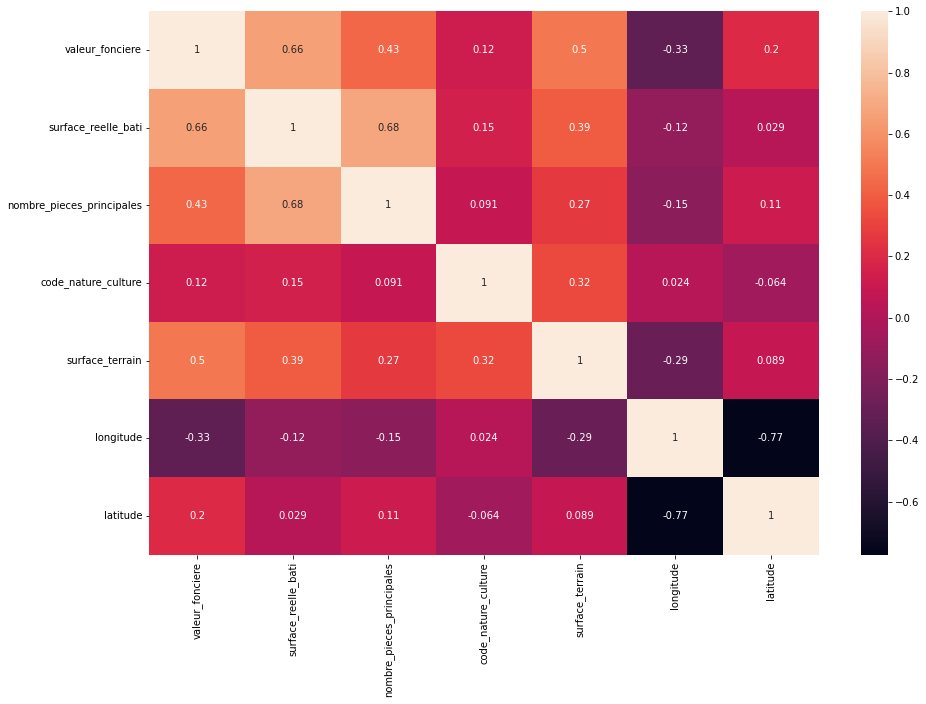

In [1871]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_mai.corr(), annot=True)

In [1872]:
df_mai = df_mai.dropna(subset=['surface_terrain'])

In [1873]:
df_mai = df_mai.drop(['code_nature_culture'], axis=1)

In [1874]:
nan_counts = df_mai.isnull().sum()
print(nan_counts)

valeur_fonciere              0
surface_reelle_bati          0
nombre_pieces_principales    0
surface_terrain              0
longitude                    0
latitude                     0
dtype: int64


In [1875]:
df_mai

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,129.0,4.0,351.0,1.071855,49.401886
2,160000.0,64.0,4.0,452.0,1.070963,49.402764
3,174000.0,64.0,4.0,498.0,1.070475,49.403622
7,180000.0,108.0,5.0,348.0,1.071647,49.401956
8,188000.0,74.0,5.0,377.0,1.070502,49.402256
...,...,...,...,...,...,...
2946,225000.0,188.0,6.0,389.0,1.069955,49.399447
2948,145000.0,74.0,5.0,374.0,1.072432,49.400659
2949,262500.0,102.0,5.0,434.0,1.069653,49.399310
2950,130000.0,64.0,4.0,369.0,1.072534,49.400600


[518100.0,
 410000.0,
 400000.0,
 400000.0,
 384000.0,
 377000.0,
 375000.0,
 375000.0,
 369200.0,
 364000.0,
 364000.0,
 361000.0,
 352400.0,
 350000.0,
 346150.0,
 345000.0,
 345000.0,
 343700.0,
 334000.0,
 334000.0,
 332800.0,
 330000.0,
 326000.0,
 326000.0,
 325080.0,
 325000.0,
 320100.0,
 320000.0,
 314000.0,
 314000.0,
 307500.0,
 307500.0,
 307000.0,
 306500.0,
 304500.0,
 300000.0,
 298000.0,
 298000.0,
 297000.0,
 295000.0,
 292550.0,
 292000.0,
 290000.0,
 290000.0,
 290000.0,
 287275.0,
 287275.0,
 283000.0,
 282000.0,
 281000.0,
 280000.0,
 278400.0,
 278400.0,
 276800.0,
 276400.0,
 275000.0,
 275000.0,
 275000.0,
 275000.0,
 270000.0,
 268000.0,
 267500.0,
 266000.0,
 263000.0,
 263000.0,
 262500.0,
 261000.0,
 260400.0,
 260000.0,
 260000.0,
 260000.0,
 259000.0,
 259000.0,
 258000.0,
 257150.0,
 257000.0,
 255000.0,
 255000.0,
 254050.0,
 253650.0,
 253500.0,
 253000.0,
 252300.0,
 252000.0,
 252000.0,
 251500.0,
 251000.0,
 250000.0,
 250000.0,
 250000.0,
 250000.0,

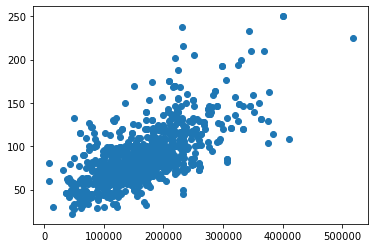

In [1876]:
plt.scatter(df_mai.valeur_fonciere, df_mai.surface_reelle_bati)
sorted(df_mai.valeur_fonciere, reverse=True)

array([[<AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>],
       [<AxesSubplot:title={'center':'nombre_pieces_principales'}>,
        <AxesSubplot:title={'center':'surface_terrain'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>]], dtype=object)

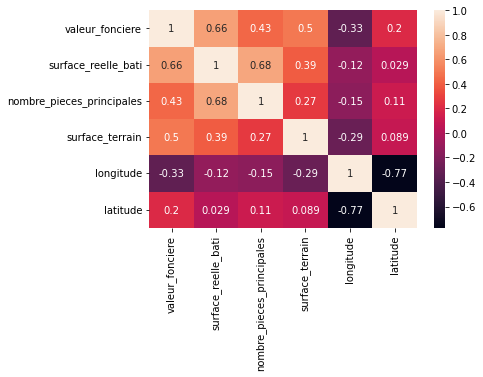

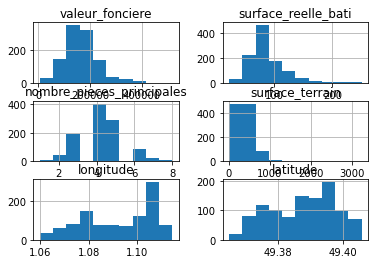

In [1877]:
sns.heatmap(df_mai.corr(), annot=True)
df_mai.hist()

In [1878]:
df_mai = df_mai.dropna()
df_mai

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,260000.0,129.0,4.0,351.0,1.071855,49.401886
2,160000.0,64.0,4.0,452.0,1.070963,49.402764
3,174000.0,64.0,4.0,498.0,1.070475,49.403622
7,180000.0,108.0,5.0,348.0,1.071647,49.401956
8,188000.0,74.0,5.0,377.0,1.070502,49.402256
...,...,...,...,...,...,...
2946,225000.0,188.0,6.0,389.0,1.069955,49.399447
2948,145000.0,74.0,5.0,374.0,1.072432,49.400659
2949,262500.0,102.0,5.0,434.0,1.069653,49.399310
2950,130000.0,64.0,4.0,369.0,1.072534,49.400600


      surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
0                   129.0                        4.0            351.0   
2                    64.0                        4.0            452.0   
3                    64.0                        4.0            498.0   
7                   108.0                        5.0            348.0   
8                    74.0                        5.0            377.0   
...                   ...                        ...              ...   
2946                188.0                        6.0            389.0   
2948                 74.0                        5.0            374.0   
2949                102.0                        5.0            434.0   
2950                 64.0                        4.0            369.0   
2951                 80.0                        4.0            354.0   

      longitude   latitude  
0      1.071855  49.401886  
2      1.070963  49.402764  
3      1.070475  49.403622  
7      

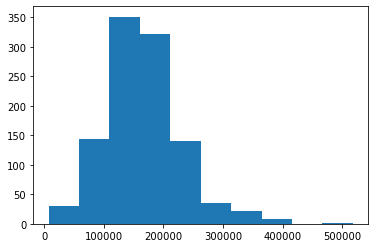

LinearRegression()

In [1886]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline  import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df_mai.drop(columns=['valeur_fonciere'], axis=1)
print(X)
y = df_mai['valeur_fonciere']
plt.hist(y)
plt.show()

#poly_features = PolynomialFeatures(degree=degree, include_bias = False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a polynomial transformer
poly = PolynomialFeatures(degree=2)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
#poly_features = PolynomialFeatures(degree=degree, include_bias = False)
reg = LinearRegression()
#X_poly = poly_features.fit_transform(X_train)
#X_poly_test = poly_features.fit_transform(X_test)


reg.fit(X_train_poly,y_train)




In [1880]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(X_test_poly)
mse = mean_squared_error(y_test, predictions)
print(mse)


1513258356.927154


In [1881]:
reg.score(X_test_poly, y_test)

0.6259508654257653

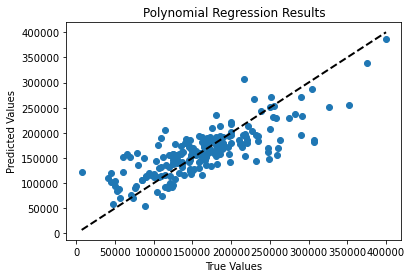

In [1882]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Results')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

In [1883]:
results = pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions})

# Print the first few rows of the results
print(results)

      True Values  Predicted Values
797      165000.0     148339.458862
129       87000.0     149518.893936
814      235000.0     184643.688934
1701     115000.0     115968.562515
406      147930.0     168326.817795
...           ...               ...
2254     173500.0     164868.049759
1060     145000.0     146979.113495
300      186000.0     171799.546616
427      164000.0     157251.942383
307      162000.0     155137.930618

[211 rows x 2 columns]


In [1884]:
scores = cross_val_score(reg, X, y, cv=5)

In [1885]:
print(np.mean(scores))

0.44844656457625875


In [1887]:
from sklearn.metrics import mean_absolute_error

# Assume that you have already trained your model and made predictions on the test set

# Compute the MAE
mae = mean_absolute_error(y_test, predictions)

print("MAE:", mae)


MAE: 28803.8081887774
